[sklearn](https://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html)

# Data

In [1]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [2]:
print(type(people))
print(dir(people))

<class 'sklearn.utils.Bunch'>
['DESCR', 'data', 'images', 'target', 'target_names']


In [3]:
print(people.DESCR)

.. _labeled_faces_in_the_wild_dataset:

The Labeled Faces in the Wild face recognition dataset
------------------------------------------------------

This dataset is a collection of JPEG pictures of famous people collected
over the internet, all details are available on the official website:

    http://vis-www.cs.umass.edu/lfw/

Each picture is centered on a single face. The typical task is called
Face Verification: given a pair of two pictures, a binary classifier
must predict whether the two images are from the same person.

An alternative task, Face Recognition or Face Identification is:
given the picture of the face of an unknown person, identify the name
of the person by referring to a gallery of previously seen pictures of
identified persons.

Both Face Verification and Face Recognition are tasks that are typically
performed on the output of a model trained to perform Face Detection. The
most popular model for Face Detection is called Viola-Jones and is
implemented in the OpenC

In [4]:
print(type(people.data))
print(type(people.images))
print(type(people.target))
print(type(people.target_names))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [5]:
print(people.data.shape)
print(people.images.shape)
print(people.target.shape)
print(people.target_names.shape)

(1288, 1850)
(1288, 50, 37)
(1288,)
(7,)


In [6]:
print(people.target_names)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']


In [7]:
print(people.target_names[people.target[0]])

Hugo Chavez


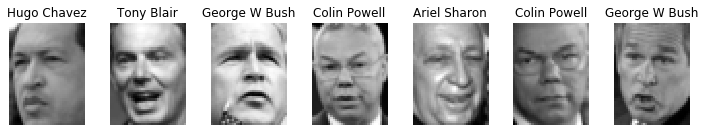

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(10,5))
for i in range(7):
    axes[i].imshow(people.images[i], cmap=plt.cm.gray)
    axes[i].set_title(people.target_names[people.target[i]])
    axes[i].axis('off')
plt.tight_layout()
plt.show()

# Train and Test Dataset

In [9]:
from sklearn.model_selection import train_test_split
x = people.data
y = people.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [10]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1030, 1850)
(258, 1850)
(1030,)
(258,)


In [11]:
print(people.target_names[y_test[0]])

Colin Powell


# SVM

In [12]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train, y_train)
print(model.score(x_test, y_test))

/Users/sungchullee/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.3798449612403101


In [13]:
from sklearn.svm import SVC
model = SVC(C=10)
model.fit(x_train, y_train)
print(model.score(x_test, y_test))

/Users/sungchullee/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.3798449612403101


In [14]:
from sklearn.svm import SVC
model = SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
model.fit(x_train, y_train)
print(model.score(x_test, y_test))

0.3798449612403101


# PCA

In [15]:
from sklearn.decomposition import PCA
n_components = 150
pca = PCA(n_components=n_components, 
          svd_solver='randomized',
          whiten=True).fit(x_train)

In [17]:
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)
print(x_train.shape, x_test.shape)
print(x_train_pca.shape, x_test_pca.shape)

(1030, 1850) (258, 1850)
(1030, 150) (258, 150)


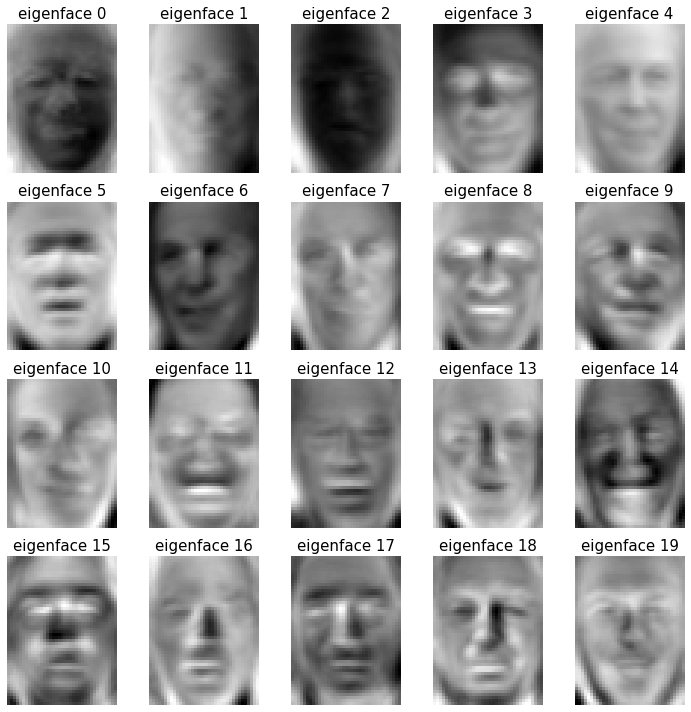

In [20]:
n_components = 150
n_samples, h, w = people.images.shape
eigenfaces = pca.components_.reshape((n_components, h, w))
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(10,10))
for i in range(4):
    for j in range(5):
        axes[i,j].imshow(eigenfaces[i*5+j], cmap=plt.cm.gray)
        axes[i,j].set_title('eigenface {}'.format(i*5+j), fontsize=15)
        axes[i,j].axis('off')
plt.tight_layout()
plt.show()

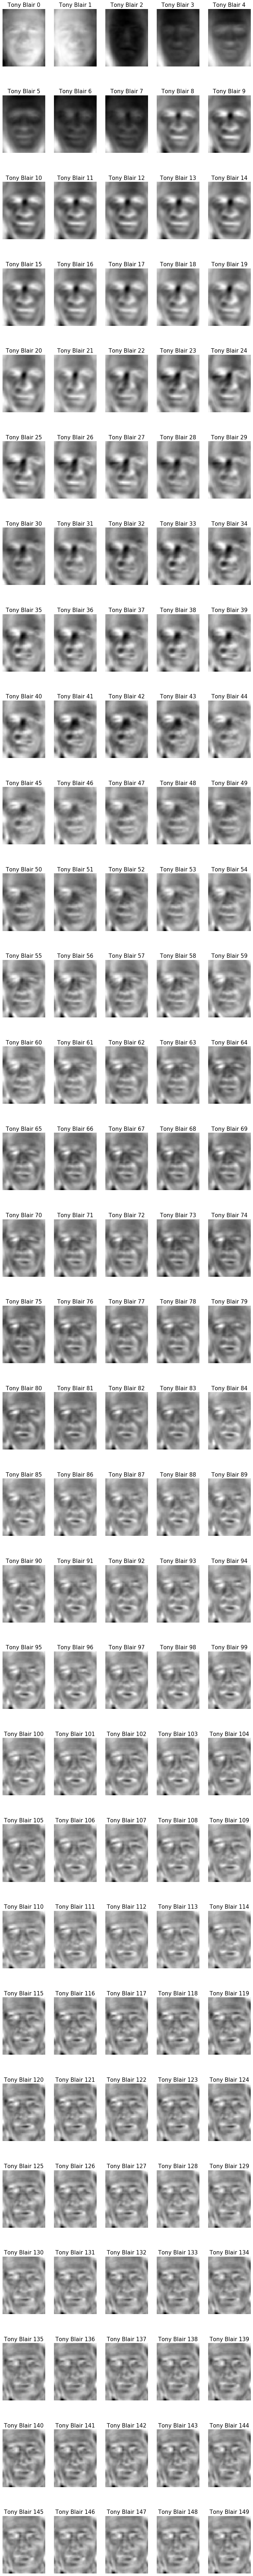

In [21]:
fig, axes = plt.subplots(nrows=30, ncols=5, figsize=(10,100))
n = 1
tmp = 0
for i in range(30):
    for j in range(5):
        tmp += x_test_pca[n, i*5+j] * eigenfaces[i*5+j]
        axes[i,j].imshow(tmp, cmap=plt.cm.gray)
        name = people.target_names[y_test[n]]
        axes[i,j].set_title('{} {}'.format(name, i*5+j), fontsize=15)
        axes[i,j].axis('off')
plt.tight_layout()
plt.show()

# SVM with PCA

In [22]:
model = SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
model.fit(x_train_pca, y_train)
print(model.score(x_test_pca, y_test))

0.8565891472868217


In [23]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1]}
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'),
                   param_grid, cv=5, iid=False)
clf = clf.fit(x_train_pca, y_train)
print(clf.best_estimator_)
print(clf.score(x_test_pca, y_test))

SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
0.8565891472868217


In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
n_classes = len(people.target_names)
y_pred = clf.predict(x_test_pca)
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))
print(classification_report(y_test, y_pred, target_names=people.target_names))

[[11  3  2  1  0  0  0]
 [ 0 46  1  8  0  0  0]
 [ 0  1 19  2  0  0  0]
 [ 0  1  0 97  0  0  0]
 [ 0  1  0  5 13  0  1]
 [ 0  0  0  3  0 10  2]
 [ 0  0  0  6  0  0 25]]
                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.65      0.79        17
     Colin Powell       0.88      0.84      0.86        55
  Donald Rumsfeld       0.86      0.86      0.86        22
    George W Bush       0.80      0.99      0.88        98
Gerhard Schroeder       1.00      0.65      0.79        20
      Hugo Chavez       1.00      0.67      0.80        15
       Tony Blair       0.89      0.81      0.85        31

         accuracy                           0.86       258
        macro avg       0.92      0.78      0.83       258
     weighted avg       0.87      0.86      0.85       258



In [25]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    import matplotlib.pyplot as plt
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
    plt.show()

In [26]:
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

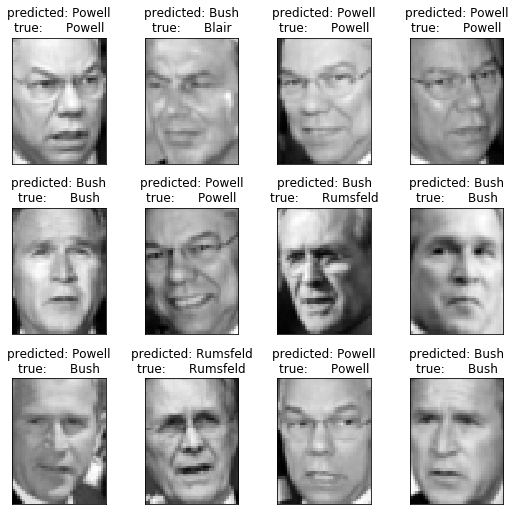

In [27]:
import matplotlib.pyplot as plt
n_samples, h, w = people.images.shape
target_names = people.target_names
prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]
plot_gallery(x_test, prediction_titles, h, w)